# Simple neural network with Numpy
By: Sakari Raappana

This is a simple two layer neural network build with Numpy. Pandas and Matplotlib libraries are used to import the data and visualize the cost function.

This model is capable for binary classification only but in a future release it might have option for multiclass classification and different choices for activation, cost and optimizing functions! ;)

In [1]:
import numpy as np
import random

In [2]:
class Model:

    def __init__(self, X):
        self.input_size = X.shape[0]
        self.hidden_size = self.input_size
        self.output_size = 1
    
    #Activation functions
    def sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        return A
        
    def relu(self, Z):
        A = np.maximum(0,Z)
        return A

    #Construct weight matrices and biases
    def init_weights(self):
        self.W1 = np.random.randn(self.hidden_size, self.input_size) * 0.1
        self.b1 = np.zeros(shape=(self.hidden_size, 1))
        self.W2 = np.random.randn(self.output_size, self.hidden_size) * 0.1
        self.b2 = np.zeros(shape=(self.output_size, 1))
        return self.W1, self.b1, self.W2, self.b2
    
    def forward_propagation(self, X):
        self.Z1 = (self.W1.T @ X) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = (self.W2 @ self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        self.pred = self.A2
        pred = self.A2
        return pred
    
    #Cross Entropy version
    def calculate_cost(self, pred, Y):
        cost = -(1.0 / m) * np.sum(Y * np.log(pred) + (1 - Y) * np.log(1 - pred))
        return cost
    
    #Calculates gradients
    def back_propagation(self, X, Y):
        m = len(X.T) #num of training samples
        dZ2 = self.pred - Y
        self.dW2 = (1/m) * dZ2 @ self.A1.T
        self.db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
        dZ1 = np.multiply((self.W2.T @ dZ2), 1 - np.power(self.A1, 2))
        self.dW1 = (1/m) * (dZ1 @ X.T)
        self.db1 = (1/m) * np.sum(dZ1, axis=1,keepdims=True)
        
    #Optimizer fuction 
    def gradient_decent(self, lr):
        self.W1 = self.W1 - lr * self.dW1
        self.b1 = self.b1 - lr * self.db1
        self.W2 = self.W2 - lr * self.dW2
        self.b2 = self.b2 - lr * self.db2
        
    #Training the model
    def fit(self, X, Y, epochs=10, lr=0.01, verbose=100, plot=True):
        self.init_weights()
        
        cost_list = []
        for i in range (1, epochs + 1):
            pred = self.forward_propagation(X)
            cost = self.calculate_cost(pred, Y)
            self.back_propagation(X, Y)
            self.gradient_decent(lr)
            cost_list.append(cost)
            
            if i % verbose == 0:
                loss = np.round(sum(cost_list) / len(cost_list), 3) #calculate average
                print(f'Loss after {i} epochs: {loss}')
        
        if plot==True:
            plt.style.use('seaborn-whitegrid')
            plt.title('Cost over epochs')
            plt.ylim(0, 1)
            plt.plot(cost_list)
        
    #Make predictions with the model
    def predict(self, X):
        pred = self.forward_propagation(X)
        binary_pred = (pred > 0.5)
        return binary_pred
    
    #Evaluate model's accuracy
    def evaluate(self, predictions, Y, plot=True):
        corrects = 0
        for i, label in enumerate(Y):
            if label == predictions[0][i]:
                corrects += 1
        accuracy = np.round(corrects / len(Y), 2)
        
        if plot==True:
            labels = ['Correct', 'Incorrect']
            sizes = [(accuracy * 100), (100 - (accuracy * 100))]
            colors = ['#00e600','#ff5000']
            fig1, ax1 = plt.subplots()
            ax1.pie(sizes, explode=(0, 0.1), labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
            ax1.axis('equal')  
            plt.tight_layout()
            plt.show()
            
        return accuracy

# Data

This is a "Heart disease" dataset containing 13 different atributes from 303 patients and also inclduding "label" dictating if the patient has the disease or not (binary classification problem). Dataset can be found here: https://www.kaggle.com/ronitf/heart-disease-uci/data#

Attribute Information:
 1. age
 2. sex
 3. chest pain type (4 values)
 4. resting blood pressure
 5. serum cholestoral in mg/dl
 6. fasting blood sugar > 120 mg/dl
 7. resting electrocardiographic results (values 0,1,2)
 8. maximum heart rate achieved
 9. exercise induced angina
 10. oldpeak = ST depression induced by exercise relative to rest
 11. the slope of the peak exercise ST segment
 12. number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
#Normalize data
df_normalized = (df - df.mean()) / df.std()

X = df_normalized.loc[0:, 'age':'thal']
Y = df['target']

print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')

X = X.to_numpy().T
Y = Y.to_numpy().T
m = len(Y)

print(f'X shape: {X.shape[0]}, {X.shape[1]}')
print(f'Y shape: {Y.shape[0]}')
print(f'Number of samples: {m}')

Shape of X: (303, 13)
Shape of Y: (303,)
X shape: 13, 303
Y shape: 303
Number of samples: 303


# Using the Model
    1. Model.init() takes the X matrix as argument.
    2. Model.fit() takes X matrix and Y vector as arguments. Epochs, learningrate and verbose can be given to overwrite default values.
    3. Model.predict() takes single datapoint or list of datapoints and returns prediction.
    
 

Loss after 1000 epochs: 0.671
Loss after 2000 epochs: 0.591
Loss after 3000 epochs: 0.536
Loss after 4000 epochs: 0.505
Loss after 5000 epochs: 0.486
Loss after 6000 epochs: 0.471
Loss after 7000 epochs: 0.461
Loss after 8000 epochs: 0.452
Loss after 9000 epochs: 0.444
Loss after 10000 epochs: 0.438
Loss after 11000 epochs: 0.433
Loss after 12000 epochs: 0.428
Loss after 13000 epochs: 0.424
Loss after 14000 epochs: 0.421
Loss after 15000 epochs: 0.417


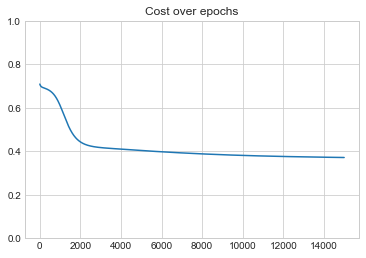

In [5]:
model = Model(X)
model.fit(X, Y, epochs=15000, lr=0.01, verbose=1000, plot=True)

### Evaluate

  In this example we use the training set also to evaluate the model which means that the accuracy represented below is to be considered as validation accuracy.

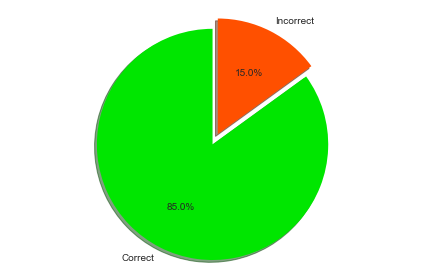

Accuracy: 0.85%


In [6]:
predictions = model.predict(X)
acc = model.evaluate(predictions, Y, plot=True)
print(f'Accuracy: {acc}%')